In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import matplotlib.cm as cm


class Generateur(object):

    def __init__(self):
        self.nbAppear = dict()
        
    def ajout(self, caractere1,caractere2):
        if caractere1 in self.nbAppear :
            if caractere2 in self.nbAppear[caractere1] :
                self.nbAppear[caractere1][caractere2] += 1
            else :
                self.nbAppear[caractere1][caractere2] = 1
        else :
            self.nbAppear[caractere1] = {caractere2 : 1}
        
    def lireMot(self, mot):
        for i in range(len(mot)-1):
            self.ajout(mot[i],mot[i+1])

    def __estLettre(self, c):
        return ("a" <= c and c <= "z") or ("à" <= c and c <= "ü")

    def __trouveMot(self,texte,i):
        mot = " "
        while self.__estLettre(texte[i].lower()) and i < len(texte):
            mot+=texte[i].lower()
            i+=1
        return mot+" ", i+1

    def lireTexte(self,fichier):
        texte = open("./ProjetPython/"+fichier, "r").read()
        i = 0
        while i < len(texte):
            mot, i = self.__trouveMot(texte,i)
            if mot != "  " :
                self.lireMot(mot)
    
    def __trouveLettre(self,caractere):
        somm = 0
        for occurrence in self.nbAppear[caractere].values():
            somm += occurrence
        return random.randint(0,somm)
        
    def caractereSuivant(self, caractere):
        alea = self.__trouveLettre(caractere)
        i = 0
        occurences = list(self.nbAppear[caractere].values())
        while alea > occurences[i]:
            alea-= occurences[i]
            i+=1
        return list(self.nbAppear[caractere].keys())[i]
    
    def genereMot(self, premiereLettre=' '):
        mot = premiereLettre
        while(mot[-1]!=' ' or len(mot)==1):
            mot+=self.caractereSuivant(mot[-1])
        return mot[1:] if mot[0]==' ' else mot

    def genereMotFixe(self, taille, premiereLettre=' '):
        mot = premiereLettre
        i = 0
        boucle = 0
        while(i < (taille-1 if mot[0]!=' ' else taille) and boucle<100):
            l = self.caractereSuivant(mot[-1])
            boucle = 0
            while(l==' ' and boucle<100):
                l = self.caractereSuivant(mot[-1])
                boucle+=1
            mot+=l
            i+=1
        return mot[1:] if mot[0]==' ' else mot
    
    def afficheMatrice(self):
        ToutesLettres = sorted([key for key in self.nbAppear.keys()])
        prop = np.matrix([[0. for y in range(0,len(ToutesLettres))] for x in range(0,len(ToutesLettres))])
        
        i = 0
        for letter1 in ToutesLettres:
            y = 0
            for letter2 in ToutesLettres:
                if letter2 in self.nbAppear[letter1].keys():
                    prop[i,y] = self.nbAppear[letter1][letter2]
                y+=1
            i+=1
        
        Somm = [x.sum() for x in prop]
        for i in range(0,len(Somm)) :
            for y in range(0,len(Somm)) :
                prop[i,y] = (float(prop[i,y])*100.0)/float(Somm[i])
        
        
        fig, ax = plt.subplots(figsize=(7,7))
        im = ax.imshow(prop, cmap=cm.binary)

        ax.set_xticks(np.arange(len(ToutesLettres)))
        ax.set_yticks(np.arange(len(ToutesLettres)))

        ax.set_xticklabels(ToutesLettres)
        ax.set_yticklabels(ToutesLettres)

        ax.set_title("Probability of letters")
        fig.tight_layout()
        plt.show()
    
    
g = Generateur()
g.lireTexte("cyrano.txt")


In [2]:
for i in range(0,10):
    print(g.genereMot())
print()
for i in range(0,10):
    print(g.genereMotFixe(5))

it 
jeurt 
luvenoue 
j 
je 
ouis 
s 
priarais 
nat 
s 

leput
menau
deran
deren
erour
meueu
técèv
montr
lesse
paive


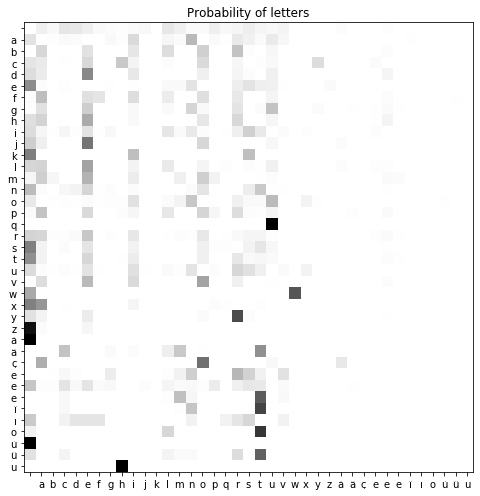

In [3]:
g.afficheMatrice()